# Project: The Movie Database Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The movie data is from TMDB api collected by Kaggle. It is the metadata about each moive in IMDB. This data contains attributes such as budget, revenue, and cast that enable us to investigate the patterns in the movie industry. According to the data, I would like to raise two question could be asked from exploring the data.

> Q1: Which genres are most popular from year to year?

> Q2: What kinds of properties are associated with movies that have high revenues?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# investigate datatype of each attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# create a drop list of uncorrelated data according to the questions.
drop_list = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'budget', 'revenue', 'production_companies', 'overview']

In [8]:
# number of observations and attributes
df.shape

(10866, 21)

In [9]:
# number of rows contain null value
sum([True for idx, row in df.iterrows() if any(row.isnull())])

8874

### Data Cleaning 

#### Cleaning columns ( Drop Extraneous Columns )

In [10]:
# drop columns that listed out previously
df.drop(drop_list, axis = 1, inplace = True)

#confirm changes
df.head(1)

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


Cast, director, genres these three columns contains few null values. They will be fixed in data pre-processing.

#### Fix Datatype

##### Fix genres

According to the questions, genres is one of important attributes so the dummy variables will be create in a new dataframe

In [12]:
attri_q1 = ['release_year']

In [13]:
# get the rows contains null value in genres column
genre_null = df.iloc[np.where(df['genres'].isnull())]

In [14]:
# drop the rows which contains null value in genres column
df.drop(genre_null.index, inplace = True)

In [15]:
# extract the unique value from the genres
liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)

In [16]:
# create a dataframe for genres
df_genre = pd.DataFrame(df['genres'])

In [17]:
# columns are dummy variables of genres
df_genre = pd.DataFrame(df_genre, columns = liste_genres)

In [18]:
# assign 1 or 0 to each genre dummy variables
for genre in liste_genres:
    df_genre[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [19]:
# add attributes for question 1
for i in attri_q1:
    df_genre[i] = df[i]

In [20]:
df_genre.head(1)

,Animation,Fantasy,Western,Thriller,Documentary,Crime,Foreign,Family,History,Romance,...,TV Movie,Music,Adventure,War,Mystery,Action,Science Fiction,Drama,Comedy,release_year
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,2015


In [21]:
# number of rows contain null value
sum([True for idx, row in df_genre.iterrows() if any(row.isnull())])

0

In [22]:
# drop duplicate rows
df_genre.drop_duplicates(inplace = True)

In [23]:
df_genre.duplicated().sum()

0

In [24]:
# export df_genre as a csv
df_genre.to_csv('tmdb_genre.csv', index = False)

##### Fix original data

#### Drop nulls, Dedupe

###### Dedup

In [25]:
# number of duplicated observations
df.duplicated().sum()

1

In [26]:
# drop duplicates
df.drop_duplicates(inplace = True)

###### Drop nulls

In [27]:
# number of rows contain null value
sum([True for idx, row in df.iterrows() if any(row.isnull())])

111

In [28]:
# drop rows with any null
df.dropna(inplace = True)

In [29]:
# checks if any of columns have null values
df.isnull().sum().any()

False

In [30]:
df.to_csv('tmdb_dedup_dropednull.csv', index = False)

###### Fix datatypes

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10731 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


Accordingly, the datatype is good for this case.

###### Gather the first director and the first cast

In [32]:
# First director
df['firstdirector'] = df['director'].apply(lambda x: x.split("|")[0])

In [33]:
# First cast
df['firstcast'] = df['cast'].apply(lambda x: x.split("|")[0])

In [34]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [35]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,firstdirector,firstcast
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow,Chris Pratt


###### Drop cast and director columns

In [36]:
df.drop(['cast', 'director', 'genres'], axis = 1, inplace = True)

In [37]:
df.to_csv('cleaned_TMDB.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Which genres are most popular from year to year?

In [38]:
# for investigating the data, I would group the genres by the year.
df_genre.head(1)

,Animation,Fantasy,Western,Thriller,Documentary,Crime,Foreign,Family,History,Romance,...,TV Movie,Music,Adventure,War,Mystery,Action,Science Fiction,Drama,Comedy,release_year
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,2015


In [39]:
# group by release year and count the mean of each genre in year
df_genyr = df_genre.groupby('release_year').mean()

In [40]:
df_genyr.head(1)

,Animation,Fantasy,Western,Thriller,Documentary,Crime,Foreign,Family,History,Romance,Horror,TV Movie,Music,Adventure,War,Mystery,Action,Science Fiction,Drama,Comedy
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.0,0.08,0.24,0.2,0.0,0.08,0.04,0.12,0.2,0.16,0.16,0.0,0.04,0.2,0.08,0.0,0.32,0.12,0.44,0.2


In [41]:
# get the most popular genre of the year according to the mean
df_genyr.loc[:, 'popgenre'] = df_genyr.idxmax(axis = 1)

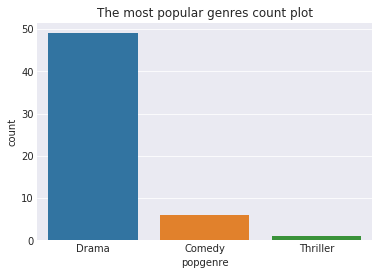

In [42]:
# countplot to visualize the popgenre
sns.countplot(x = 'popgenre', data = df_genyr)

# add up title
plt.title('The most popular genres count plot');

The most popular genres count plot shows that three main genres which are Drama, Comedy, and Thriller are popular year by year. In order to investigate the trend of these three, we have to create the line plot based on year.

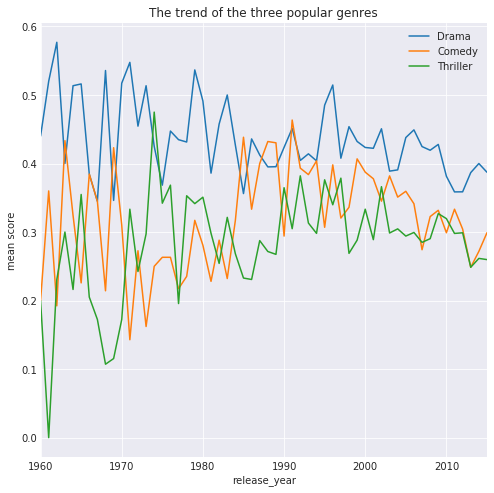

In [43]:
# Popular genres trend
df_genyr.plot(y = ['Drama', 'Comedy', 'Thriller'], kind = 'line', figsize = [8, 8])

plt.title('The trend of the three popular genres')
plt.ylabel('mean score');

Accordingly, Drama, Comedy, and Thriller are the most popular genres from 1960 to 2015 especially Drama is dominated. However, around 1975s, Thriller reached its peak and Comedy was more popular than Drama during 1985 to 1995.

### Q2: What kinds of properties are associated with movies that have high revenues?

In [44]:
# create profit column that shows the profit and help to define revenue level(if profit > 0 define as high revenue)
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [45]:
# define the revenue level according to the profit.
df['revenue_level'] = df['profit'].apply(lambda x: 'High' if x > 0 else 'Low')

In [46]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.head(1)

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,firstdirector,firstcast,profit,revenue_level
0,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow,Chris Pratt,1.254446e+09,High


In [47]:
# drop the revenue == 0
df.drop(df[df.revenue_adj == 0].index, inplace = True)

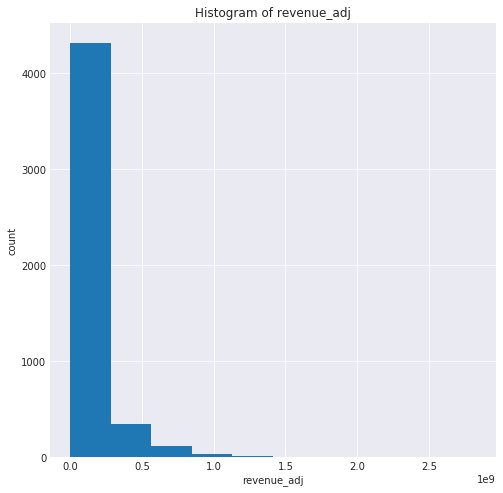

In [48]:
# take a look on revenue_adj distribution
df['revenue_adj'].hist(figsize = [8, 8])

plt.title('Histogram of revenue_adj')
plt.xlabel('revenue_adj')
plt.ylabel('count');

The adjusted revenue histogram shows that most valid adjusted revenue were greater than 0 even they were centred on 0 to 0.25(normalized) range.

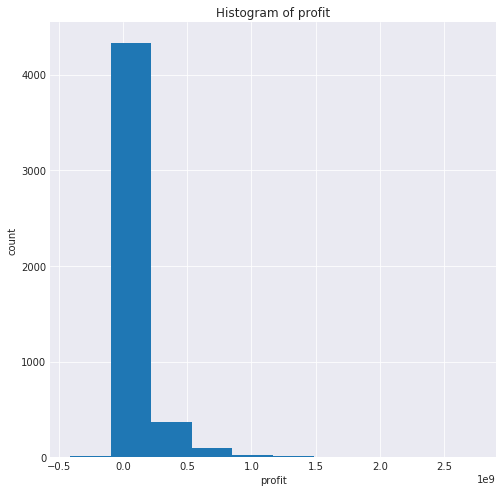

In [49]:
# plot the histogram about profit
df['profit'].hist(figsize = [8, 8])
plt.title('Histogram of profit')
plt.xlabel('profit')
plt.ylabel('count');

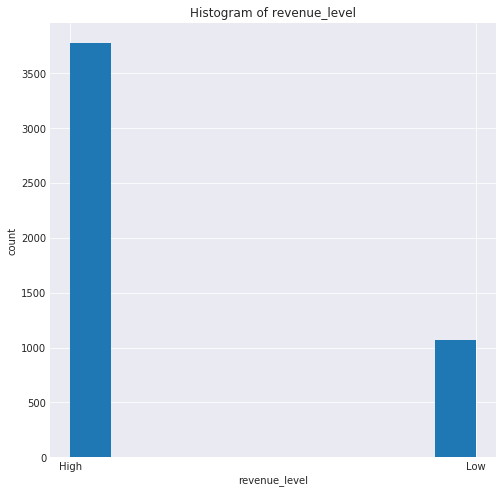

In [50]:
df['revenue_level'].hist(figsize = [8, 8])
plt.title('Histogram of revenue_level')
plt.xlabel('revenue_level')
plt.ylabel('count');

Profit distribution shows the profit values are centred around 0 to 0.25 (normalized). Roughly speaking, most profits are greater than 0 that means they are high revenue movies. Therefore, revenue level distribution which defined by profit shows the most count in high revenue level.

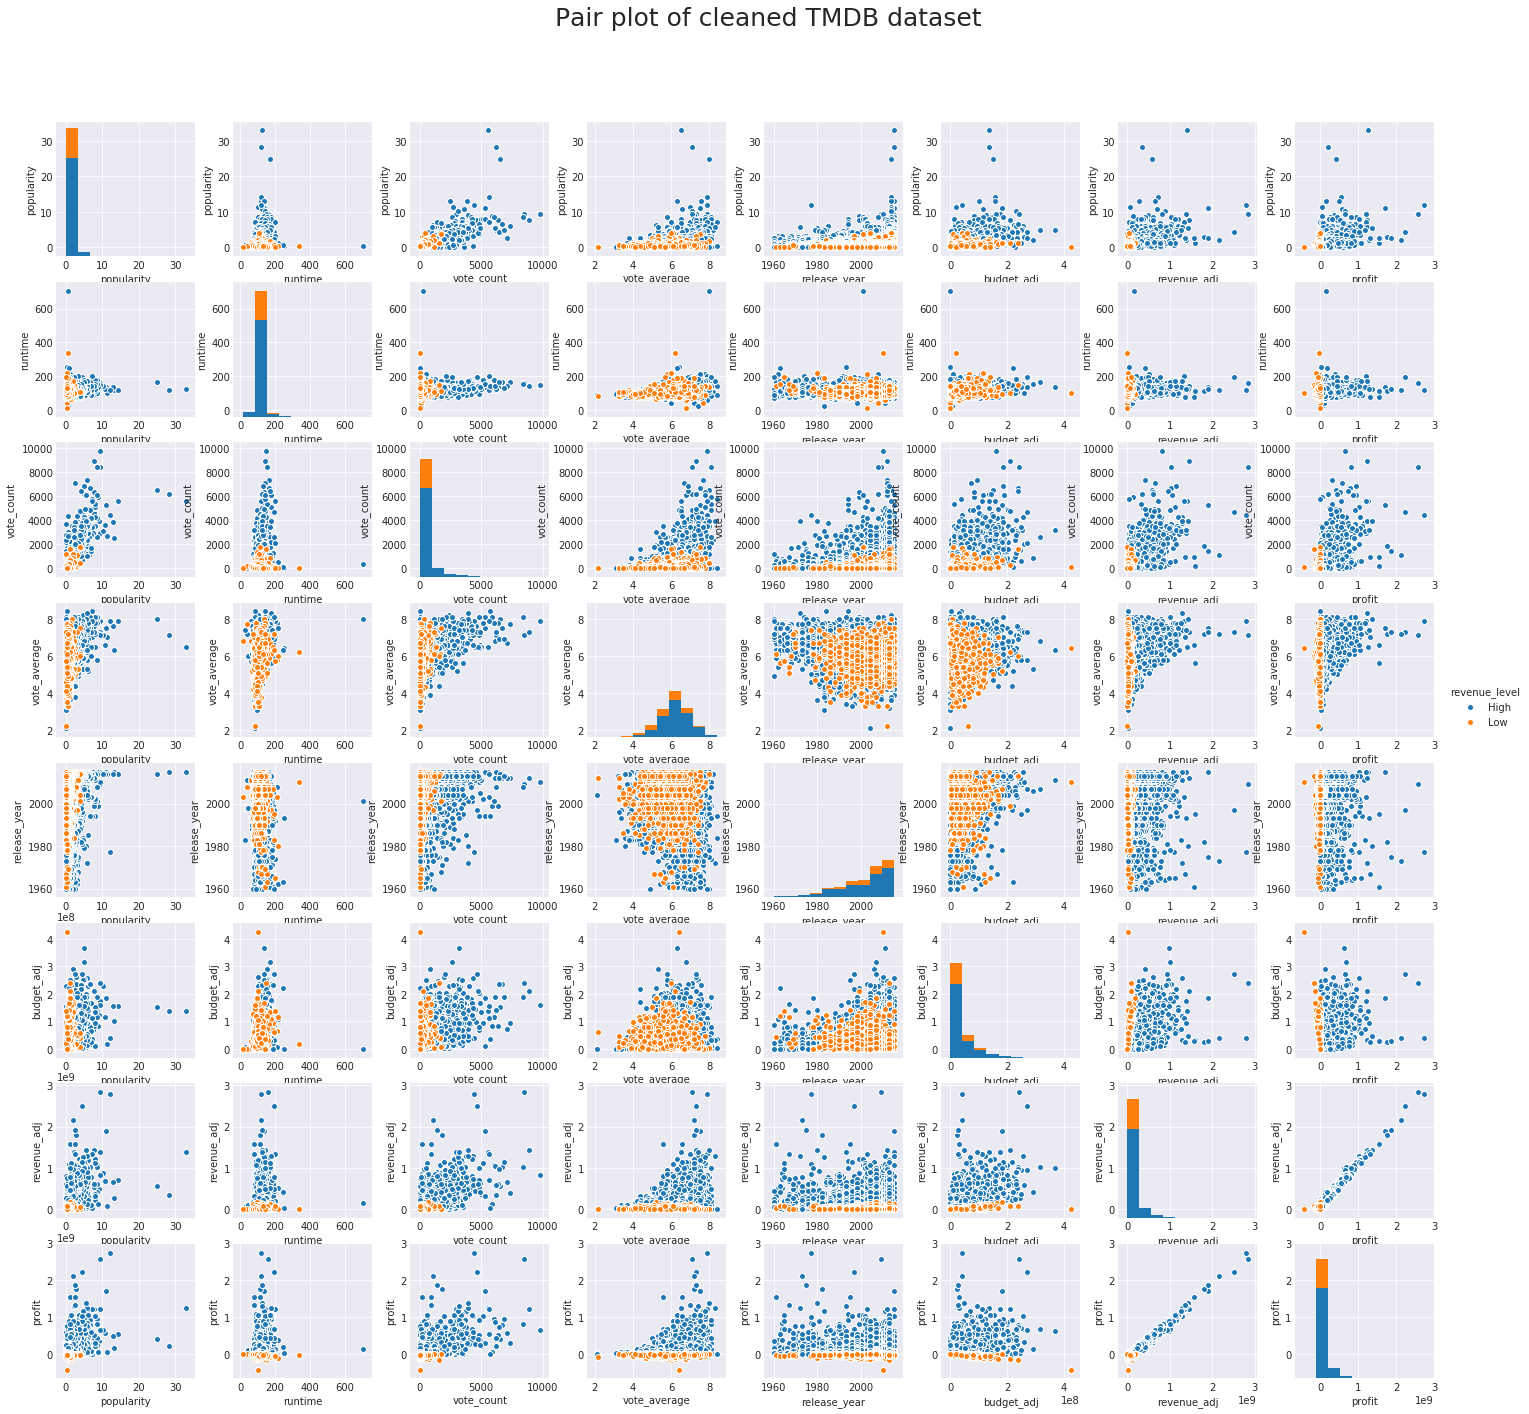

In [51]:
# pair plot the dataset in order to observe the relationship between each two attributes.
pairpl = sns.pairplot(df, hue = 'revenue_level')

# get the axis label from each plot
xlabels,ylabels = [],[]

for ax in pairpl.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in pairpl.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        pairpl.axes[j,i].xaxis.set_label_text(xlabels[i])
        pairpl.axes[j,i].yaxis.set_label_text(ylabels[j])
# show the main title of the pairplot
pairpl.fig.subplots_adjust(top=0.9)
pairpl.fig.suptitle('Pair plot of cleaned TMDB dataset', fontsize=25);

According to plot runtime versus revenue_adj, popularity versus revenue_adj, and vote_average versus revenue_adj, We can observe that high revenue is correlated to popularity, runtime, vote average, so we have to plot them out to investigate them.

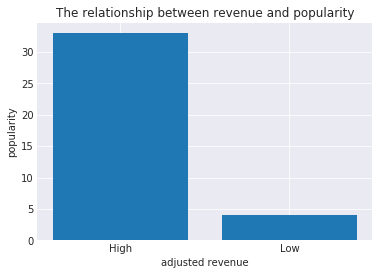

In [52]:
# plot the relationship between revenue_adj, popularity, runtime, and vote average
plt.bar(df['revenue_level'], df['popularity'], alpha = 1);

plt.title('The relationship between revenue and popularity')
plt.xlabel('adjusted revenue')
plt.ylabel('popularity');

This bar chart shows that high adjusted revenue movies had all range of popularity, however, low adjusted revenue movies had no greater than 5 of popularity score.

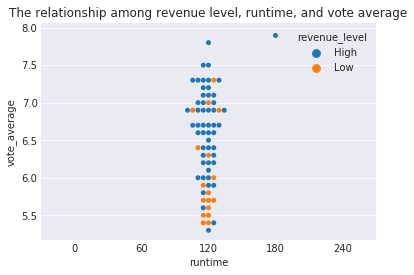

In [53]:
# relationship among runtime, vote_average, and revenue level.
sns.swarmplot(x = 'runtime', y = 'vote_average', hue = 'revenue_level', data = df, order = [0, 60, 120, 180, 240])

plt.title('The relationship among revenue level, runtime, and vote average');

In terms of the plots, we can make some conclusions about the properties that correlated to the high revenue.
1. High revenue movies had all range of popularity score, but low revenue moives were all lower than popularity score 5.
2. Most high revenue movies had around 120 minutes runtime and greater than vote average score 6.

## Conclusion

According to the visualization, two questions have been identified and the conclusions were the following:
1. Three genres which are Drama, Comedy, and Thriller were popular year by year from 1985 to 2015. 
2. The movies with high revenue were around 120 minutes runtime, greater than 6 in vote score in average.

However, limitations were also existed to my conclusion for these two questions.
1. The popular genres were selected due to the highest appearence mean aggregated by year. In this case, according to the limited data points, it showed the popular three but it cannot represent the real mainstream genres of that specific year. Some genres may be underestimated.
2. Lots of the budget infomation was missing so that they were replace by 0. Therefore, some high revenue level might not be evaluated as the proved value then the revenue level existed underestimate or overestimate.

Overall, this project roughly showed some data patterns based on these two questions. There are much more patterns can be investigated.

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0